In [3]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [14]:
hp_data = pd.read_excel(r'data\parsed_data.xlsx', sheet_name='hardpoint').iloc[2:, :].drop('Unnamed: 1', axis=1)
snd_data = pd.read_excel(r'data\parsed_data.xlsx', sheet_name='snd').iloc[2:, :].drop('Unnamed: 1', axis=1)
dom_data = pd.read_excel(r'data\parsed_data.xlsx', sheet_name='dom').iloc[2:, :].drop('Unnamed: 1', axis=1)

hp_data.set_index('Player', inplace=True)

def sigmoid(x):

  return 1 / (1 + math.exp(-x))

In [15]:
# showing columns to get a quick glance at available stats
print(hp_data.columns)
# creating df to hold standardized stats to create rating
hp_data.head()

Index(['Team', 'Role', 'Kills', 'High Kills', 'Kills per Min', 'Kp10M', 'EpM',
       'Ep10M', 'Death', 'High Deaths', 'Deaths per min', 'Dp10M', 'K/D',
       'High K/D', 'Plus / Minus', 'Assists', 'ApG', 'High Plus / Minus',
       'Hill Time', 'Hill Time per Game', 'High Hill Time',
       'Hill Time / Game Time', 'Engage Success', 'True Engage Success',
       'HP Games', 'HP Mins'],
      dtype='object')


,Team,Role,Kills,High Kills,Kills per Min,Kp10M,EpM,Ep10M,Death,High Deaths,...,ApG,High Plus / Minus,Hill Time,Hill Time per Game,High Hill Time,Hill Time / Game Time,Engage Success,True Engage Success,HP Games,HP Mins
Player,,,,,,,,,,,,,,,,,,,,,
aBeZy,ATL,SMG,337.0,33.0,2.512863,25.128626,5.294162,52.941615,373.0,40.0,...,9.500,6.0,712.0,54.769231,96.0,5.309075,0.474648,0.525445,13.0,134.11
Cellium,ATL,FLEX,401.0,42.0,2.990083,29.900828,5.361271,53.612706,318.0,29.0,...,8.750,16.0,536.0,41.230769,73.0,3.996719,0.557719,0.596958,13.0,134.11
MajorManiak,ATL,AR,274.0,30.0,2.043099,20.430989,3.914697,39.146969,251.0,28.0,...,10.000,9.0,816.0,62.769231,105.0,6.084557,0.521905,0.585124,13.0,134.11
Priestahh,ATL,FLEX,342.0,38.0,2.550145,25.501454,4.995899,49.958989,328.0,33.0,...,8.125,19.0,995.0,76.538462,120.0,7.419283,0.510448,0.553741,13.0,134.11
Simp,ATL,SMG,382.0,41.0,2.848408,28.484080,5.182313,51.823130,313.0,31.0,...,10.125,27.0,556.0,42.769231,98.0,4.145850,0.549640,0.596649,13.0,134.11


In [16]:
# going to look into engagements
# creating a total successful engagement stat and avg engagement
hp_data['Total_Engagements'] = round(hp_data['HP Mins'] * hp_data['EpM'], 0)
hp_data['Success_Engagements'] = round(hp_data['Total_Engagements'] * hp_data['True Engage Success'], 0)
hp_data['Avg_Engage_Success'] = hp_data['Success_Engagements'] / hp_data['HP Games']
hp_data['AES_std'] = preprocessing.scale(hp_data['Avg_Engage_Success'])

In order to know which players stats should be included, looking at the distribution of games played and will remove any players 1 standard deviation below the mean amount of matches played. This will remove most benched players along with their replacements. If a benched player had a few bad maps and got benched or a replacement has a hot first few games, they will not distort the data.

AxesSubplot(0.125,0.125;0.775x0.755)
count    67.000000
mean     12.835821
std       4.607625
min       3.000000
25%      11.000000
50%      13.000000
75%      16.000000
max      20.000000
Name: HP Games, dtype: float64


,Team,Role,Kills,High Kills,Kills per Min,Kp10M,EpM,Ep10M,Death,High Deaths,...,High Hill Time,Hill Time / Game Time,Engage Success,True Engage Success,HP Games,HP Mins,Total_Engagements,Success_Engagements,Avg_Engage_Success,AES_std
Player,,,,,,,,,,,,,,,,,,,,,
Scump,CHI,SMG,406.0,35.0,2.568157,25.681574,5.364033,53.640331,442.0,36.0,...,101.0,2.713644,0.478774,0.509978,15.0,158.09,848.0,432.0,28.8,0.684818


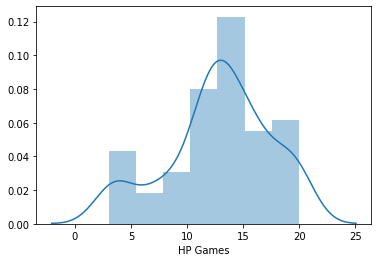

In [17]:
print(sns.distplot(hp_data['HP Games']))
print(hp_data['HP Games'].describe())
hp_data[hp_data.index == 'Scump']

AxesSubplot(0.125,0.125;0.775x0.755)
Mean:  12.835820895522389 Std: 4.607625481036427


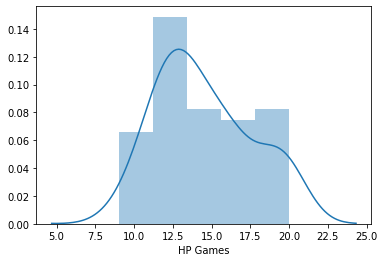

In [18]:
# removing players who have played less than 1 standard deviation from the average amount of maps played.
hp_data_clip = hp_data[hp_data['HP Games'] >= (hp_data['HP Games'].mean() - hp_data['HP Games'].std())]
print(sns.distplot(hp_data_clip['HP Games']))
print('Mean: ', hp_data['HP Games'].mean(), 'Std:', hp_data['HP Games'].std())

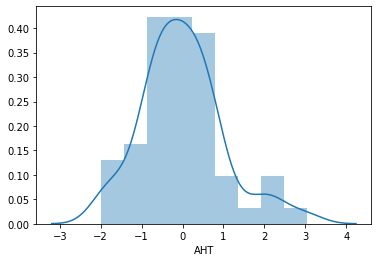

In [19]:
hp_data_clip['Avg_HT'] = hp_data_clip['Hill Time'] / hp_data_clip['HP Games']
hp_data_clip['AHT'] = preprocessing.scale(hp_data_clip['Avg_HT'])
sns.distplot(hp_data_clip['AHT'])

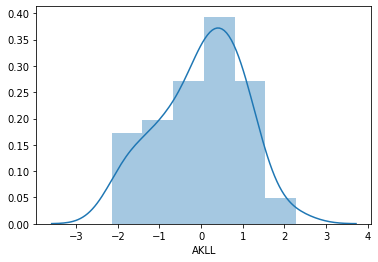

In [20]:
hp_data_clip['Avg_K'] = hp_data_clip['Kills'] / hp_data_clip['HP Games']
hp_data_clip['AKLL'] = preprocessing.scale(hp_data_clip['Avg_K'])
sns.distplot(hp_data_clip['AKLL'])

In [30]:
print(hp_data_clip.columns)

stats = ['AES_std', 'AHT', 'AKLL', 'K/D']
hp_data_clip['rting'] = (hp_data_clip['AES_std'] + hp_data_clip['AHT'] + hp_data_clip['AKLL'] + hp_data_clip['K/D']) / 4
hp_data_clip.groupby('Role')['rting'].mean()

Index(['Team', 'Role', 'Kills', 'High Kills', 'Kills per Min', 'Kp10M', 'EpM',
       'Ep10M', 'Death', 'High Deaths', 'Deaths per min', 'Dp10M', 'K/D',
       'High K/D', 'Plus / Minus', 'Assists', 'ApG', 'High Plus / Minus',
       'Hill Time', 'Hill Time per Game', 'High Hill Time',
       'Hill Time / Game Time', 'Engage Success', 'True Engage Success',
       'HP Games', 'HP Mins', 'Total_Engagements', 'Success_Engagements',
       'Avg_Engage_Success', 'AES_std', 'Avg_HT', 'AHT', 'Avg_K', 'AKLL',
       'rting', 'rank'],
      dtype='object')


Role
AR      0.592421
FLEX    0.233773
SMG     0.174227
Name: rting, dtype: float64

In [31]:
rting_role_mu = hp_data_clip.groupby('Role')['rting'].mean().to_dict()

hp_data_clip['rank'] = 0
for x in rting_role_mu.keys():
    hp_data_clip.loc[hp_data_clip['Role'] == x, 'rting'] = hp_data_clip['rting'] - rting_role_mu[x]
    hp_data_clip.loc[hp_data_clip['Role'] == x, 'rting'] = [sigmoid(x) for x in hp_data_clip.loc[hp_data_clip['Role'] == x]['rting']]
    hp_data_clip.loc[hp_data_clip['Role'] == x, 'rting'] += (0.99 - hp_data_clip[hp_data_clip['Role'] == x]['rting'].max())
    hp_data_clip.loc[hp_data_clip['Role'] == x, 'rank'] = hp_data_clip.loc[hp_data_clip['Role'] == x]['rting'].rank(ascending=False)

hp_data_clip[['Role', 'rting']].sort_values(by=['Role', 'rting'], ascending=False)
hp_data_clip['rting'] = round(hp_data_clip['rting'], 2)
hp_data_clip[['rting']] / .01

,rting
Player,
aBeZy,87.0
Cellium,99.0
MajorManiak,53.0
Priestahh,93.0
Simp,99.0
Arcitys,85.0
Envoy,86.0
Formal,65.0
Gunless,86.0
